In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('Social_Network_Ads.csv')

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df=df.drop(['User ID', 'Gender'], axis=1)

In [9]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Train Test Split

In [10]:
X=df.drop('Purchased', axis=1)
y=df.Purchased

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)

# Standard Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#fit the scaler to train set
scaler.fit(X_train)

#transform train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [14]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [15]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [16]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [17]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [18]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

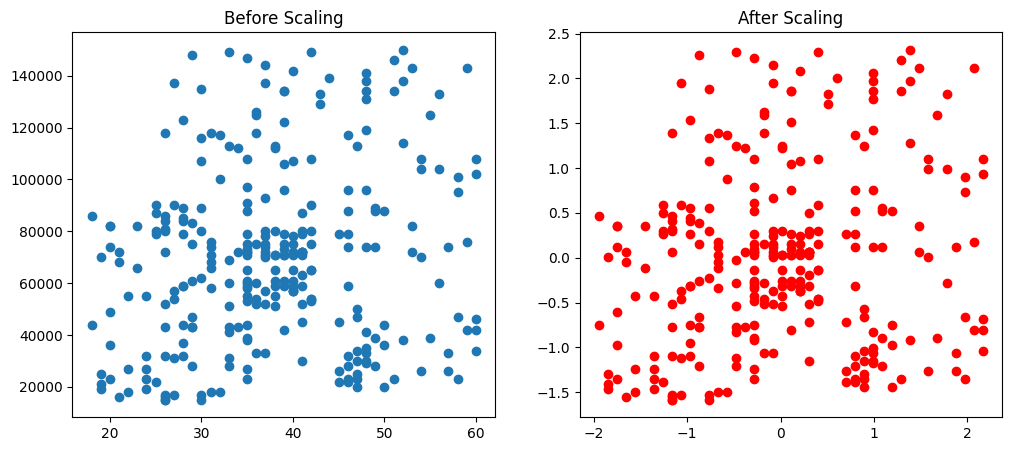

In [19]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show()

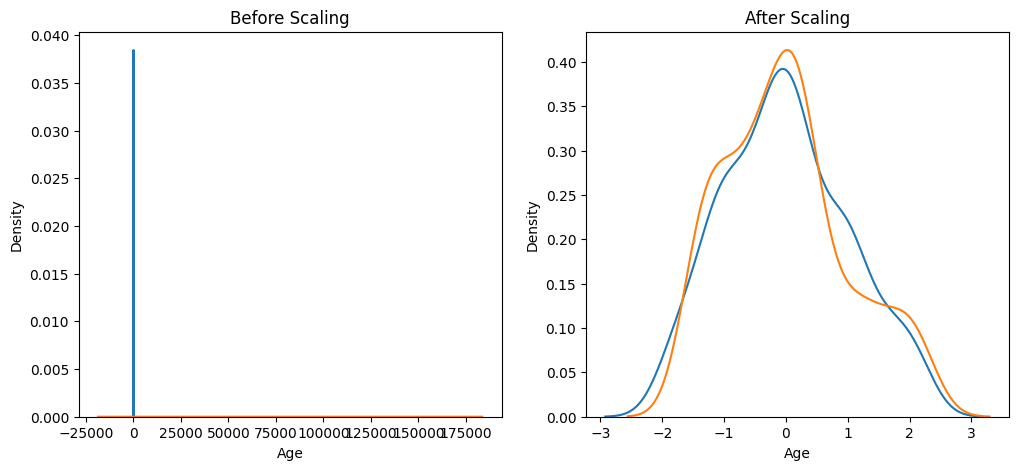

In [20]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

# Comparision of Distributions

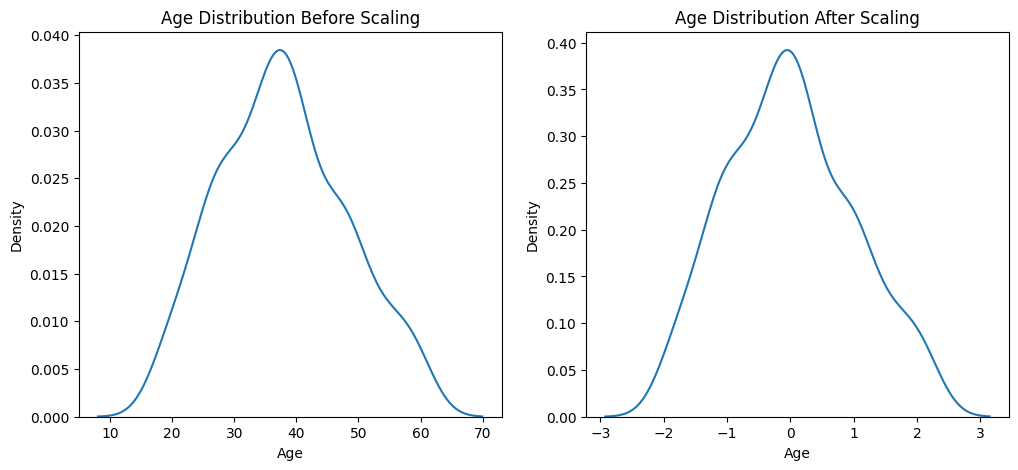

In [21]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)

ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)

plt.show()

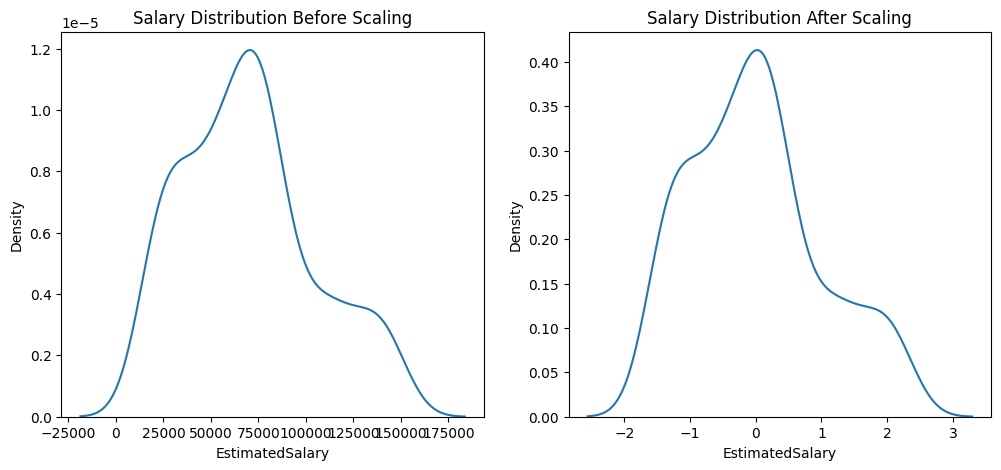

In [22]:
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Salary Distribution Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

ax2.set_title("Salary Distribution After Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

# Why Scaling is Important?

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [27]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
without_scaling=accuracy_score(y_pred,y_test)
with_scaling=accuracy_score(y_pred_scaled,y_test)

In [32]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


# Not All Algorithms are Affected by Scaling

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [36]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
y_pred_dt=dt.predict(X_test)
y_pred_dt_scaled=dt_scaled.predict(X_test)

In [41]:
without_scaling=accuracy_score(y_pred_dt,y_test)
with_scaling=accuracy_score(y_pred_dt_scaled,y_test)

In [43]:
print("Actual",without_scaling)
print("Scaled",with_scaling)

Actual 0.875
Scaled 0.875


# Impact of Outliers

## Scaling does not have any effect on the impact of ouliers

In [45]:
# df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})], ignore_index=True)

In [46]:
df.shape

(403, 3)

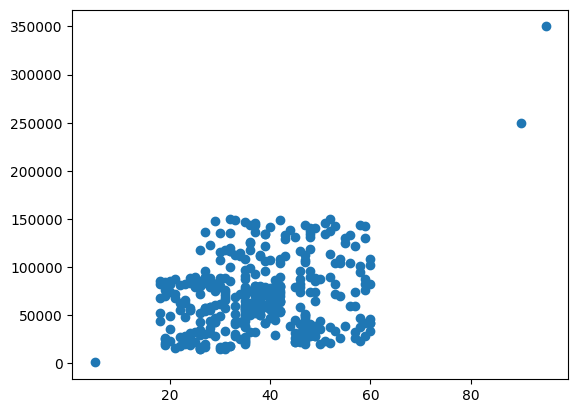

In [47]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

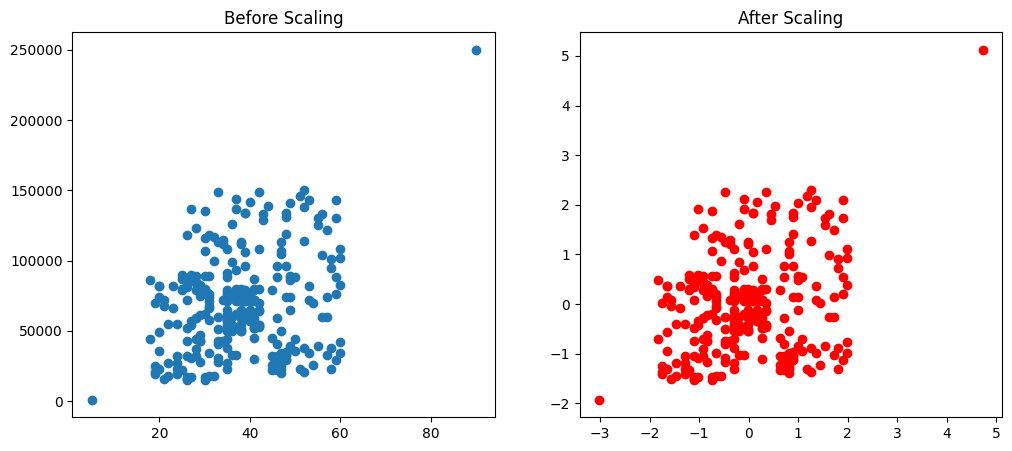

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()